In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
from scipy.interpolate import RectBivariateSpline
import numpy as np

In [3]:
from vaneska.interpolate import ScipyRectBivariateSpline

In [4]:
from lightkurve import KeplerTargetPixelFile

In [5]:
import tensorflow as tf

In [6]:
from vaneska.models import KeplerPRF

In [7]:
tpf = KeplerTargetPixelFile.from_archive('kepler-10b', quarter=5)

INFO: Found cached file ./mastDownload/Kepler/kplr011904151_lc_Q111111110111011101/kplr011904151-2010174085026_lpd-targ.fits.gz with expected size 4685387. [astroquery.query]


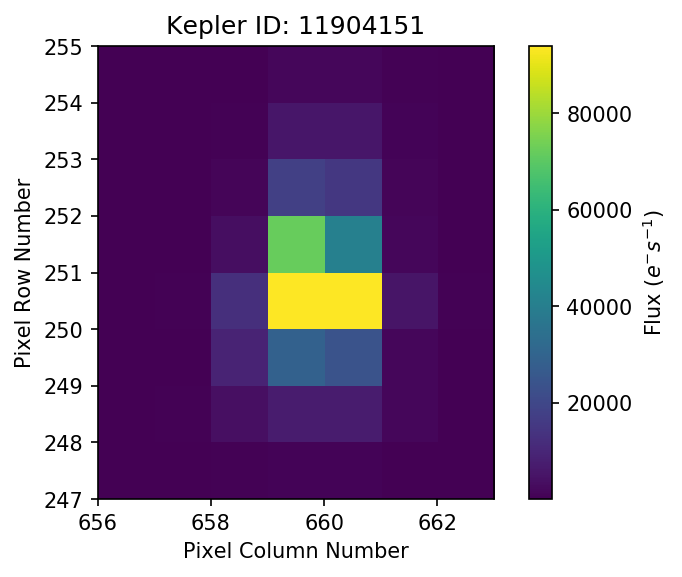

In [8]:
tpf.plot()

In [9]:
prf = KeplerPRF(channel=tpf.channel, shape=tpf.shape[1:], column=tpf.column, row=tpf.row)

In [10]:
flux = tf.Variable([1.6e5], dtype=tf.float64)
xc = tf.Variable([tpf.column + 4.], dtype=tf.float64)
yc = tf.Variable([tpf.row + 4.], dtype=tf.float64)
bkg = tf.Variable([10000.], dtype=tf.float64)

In [11]:
var_list = [flux, xc, yc, bkg]

In [12]:
model = prf(flux, xc, yc) + bkg
model

<tf.Tensor 'add:0' shape=<unknown> dtype=float64>

In [13]:
sess = tf.Session()

In [14]:
sess.run(tf.global_variables_initializer())

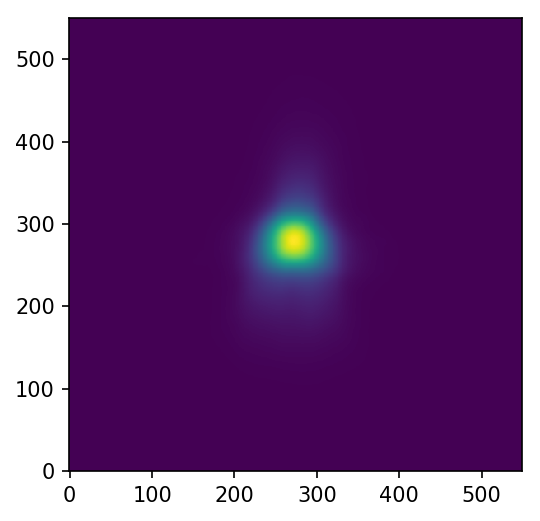

In [15]:
plt.imshow(prf.supersampled_prf, origin='lower')

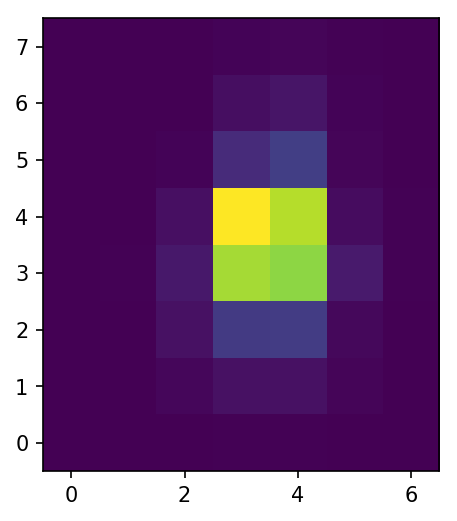

In [16]:
plt.imshow(sess.run(model), origin='lower')

In [17]:
data = tf.placeholder(dtype=tf.float64, shape=tpf.flux[0].shape)

In [18]:
loss = tf.reduce_sum(model - data * tf.log(model))

In [19]:
grad = tf.gradients(loss, var_list)

In [20]:
grad

[<tf.Tensor 'gradients/mul_grad/Reshape:0' shape=(1,) dtype=float64>,
 <tf.Tensor 'gradients/sub_grad/Reshape_1:0' shape=(1,) dtype=float64>,
 <tf.Tensor 'gradients/sub_1_grad/Reshape_1:0' shape=(1,) dtype=float64>,
 <tf.Tensor 'gradients/add_grad/Reshape_1:0' shape=(1,) dtype=float64>]

In [21]:
sess.run(tf.global_variables_initializer())

In [23]:
sess.run(grad, feed_dict={data: tpf.flux[0] + tpf.flux_bkg[0]})

InvalidArgumentError: Input to reshape is a tensor with 7 values, but the requested shape has 1
	 [[Node: gradients/sub_grad/Reshape_1 = Reshape[T=DT_DOUBLE, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients/sub_grad/Neg, gradients/sub_grad/Shape_1)]]

Caused by op 'gradients/sub_grad/Reshape_1', defined at:
  File "/Users/jvmirca/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/jvmirca/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-6924c17fdc52>", line 1, in <module>
    grad = tf.gradients(loss, var_list)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 611, in gradients
    lambda: grad_fn(op, *out_grads))
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 377, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 611, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py", line 777, in _SubGrad
    array_ops.reshape(-math_ops.reduce_sum(grad, ry), sy))
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3903, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'sub', defined at:
  File "/Users/jvmirca/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 18 identical lines from previous traceback]
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-76e19ad12f2d>", line 1, in <module>
    model = prf(flux, xc, yc) + bkg
  File "/Users/jvmirca/dev/vaneska/vaneska/models.py", line 96, in __call__
    return self.evaluate(flux, xc, yc)
  File "/Users/jvmirca/dev/vaneska/vaneska/models.py", line 99, in evaluate
    dx = self.x - xc
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 934, in binary_op_wrapper
    return func(x, y, name=name)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4819, in _sub
    "Sub", x=x, y=y, name=name)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/Users/jvmirca/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 7 values, but the requested shape has 1
	 [[Node: gradients/sub_grad/Reshape_1 = Reshape[T=DT_DOUBLE, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](gradients/sub_grad/Neg, gradients/sub_grad/Shape_1)]]
